# Gradient Descent

After designing neural network, It is time for the parameters of the neural network to be set. **This process is known as model fitting or parameter estimation**. In statistics, we find the estimates of the parameters in the model using minimization of the empirical risk. This is the proper process only when the model is simple or the training dataset can represent the whole population so that the empirical risk is close to the true risk. If not, simply estimating the parameters of the model that makes the empirical risk to be minimized can lead to overfitting.

Let us denote $x$ a training input(one sample) which is n-dimensional vector and denote y the desired output from the network which is k-dimensional vector. **Note that the loss function is defined as the difference between the ideal and the model for a single training sample and the empirical risk is defined as the average of the loss function over all training data**. Using the quadratic loss function, the empirical risk is as follows:

$$C(w,b)=\frac{1}{n}\sum_{all x}L_{x},$$

where $$\quad L_{x}=\frac{(y-\hat{y})^2}{2}.$$

Note that $\hat{y}$ is our model and

$$\hat{y}=pr(y=1|w,b)=E(y|w,b)=f_{L}(f_{L-1}(\cdot\cdot\cdot f_1(x|w^1,b^1)\cdot\cdot\cdot |w^{L-1},b^{L-1})|w^L,b^L).$$

Define $\theta$ as a vector of all weights and biases. i.e., $\theta=(w^1,w^2, ... ,w^{L-1}, w^L, b^1, b^2, ..., b^{L-1}, b^L)$. **Since the loss function $L_x$ is a function of $\theta$**, the empirical risk $C$ is also a function of $\theta$. The change of $C$ by moving a given point $\theta_{t}$ to the point of $\theta_{t}+\Delta\theta$ is as follows:

$$\Delta C\approx \frac{\partial C}{\partial w^1}\centerdot\Delta w^1+...+\frac{\partial C}{\partial w^L}\centerdot\Delta w^L+\frac{\partial C}{\partial b^1}\centerdot\Delta b^1+...+\frac{\partial C}{\partial b^L}\centerdot\Delta b^L.$$

Therefore, the equation can be rewritten in a matrix form,

$$\Delta C\approx\nabla C\bullet\Delta\theta.$$

Choose $\Delta\theta=-\eta\nabla C$ which means $\Delta\theta$ is the vector that is perpendicular to the contour in a decreasing direction scaling by $\eta$. In other words, **$\nabla C$ takes on the direction of the movement and $\eta$ takes on the scale of the movement**. Hence, the above equation can be rewritten as

$$\Delta C\approx-\eta\|\nabla C\|^2$$

Since $\nabla C$ is always greater than or equal to 0, $\Delta\theta$ always makes $C$ to be changed in a decreasing way.

Then the updating equation is as follows:

$$\theta^{t+1}=\theta^{t}-\eta\nabla C$$

Recapping, the way the gradient descent algorithm works is to repeatedly compute $\nabla C$ at the point $\theta_{t}$, and then to move in the opposite direction.

# Stochastic Gradient Descent

There are a number of challenges in applying the gradient descent rule to the neural network. One of those is that we have to compute $\nabla C$, a gradient vector for every step(t$\rightarrow$t+1) in the gradient descent algorithm.

Notice that the empirical risk has the form of $C=\frac{1}{n}\sum_{all x}L_{x}$, that is, it's an average over the loss for every single training input. In practice, every step in the gradient descent algorithm, we have to compute $\nabla C$ by computing $\nabla L_{x}$ seperately for each individual training input and then average them, $\nabla C=\frac{1}{n}\sum_{all x}\nabla L_{x}$. When the number of training inputs is huge, this process consumes time a lot.

The key idea of the stochastic gradient descent algorithm is to estimate $\nabla C$ only with a small sample of randomly chosen training inputs and we refer to those samples as a mini-batch. In other words, **we estimate the direction of the movement for each step using smaller sample in the stochastic gradient algorithm**. **Note that all loss functions for each sample has the form of plane in the coordinate of all biases and weights and the empirical risk is just plane which is the average of all plane of the loss functions**. Hence,

$$\nabla C=\frac{\sum_{i=1}^n \nabla L_{X_i}}{n}\approx\frac{\sum_{j=1}^m \nabla L_{X_j}}{m},\quad where \quad m \ll n.$$

Therefore, the updating equation is as follows:

$$\theta^{t+1} = \theta^{t} -\eta\frac{\sum_{j=1}^m \nabla L_{X_j}}{m}.$$

$$w_{k}^{t+1}=w_{k}^{t}-\frac{\eta}{m} \sum_{j}  \frac{\partial L_{X_{j}}}{\partial w_{k}},\qquad b_{l}^{t+1}=b_{l}^{t}-\frac{\eta}{m} \sum_{j}  \frac{\partial L_{X_{j}}}{\partial b_{l}}.$$

As the algorithm computes $\nabla C$ at every step(t$\rightarrow$t+1), we pick out different randomly choosen mini-batch at each step until completing an epoch of training.

The partial derivatives of the loss fuction for each sample can be computed using Backpropagation.

# Backpropagation

Backpropagation is about understanding how changing the weights and biases in a network changes a loss function. This is related to compute the partial derivatives of the loss function.

Define the error $\delta_j^l$ of neuron $j$ in layer $l$ by

$$\delta_j^l\equiv\frac{\partial L_x}{\partial z_j^l},\qquad where\quad z_j^l=\sum_k w_{jk}^la_k^{l-1}+b_j^l.$$

Note that $L_x$ is the function of $w$ and $b$ for a given single observation $x$. The meaning of $\delta_j^l$ is that the rate of chainging $L_x$ by a small change in $z_j^l$ which is the function of $w^l$ and $b^l$. 

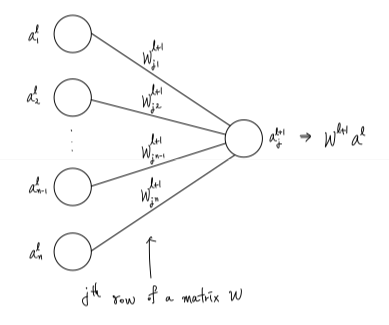

We are going to have the four fundamental equations using the error of neuron and hierarchical structure of the network.

### The four fundamental equations.

First, an equation for the error in the output layer, $\delta^L$ is given by in a matrix form,

$$(1)\quad\delta^L=\nabla_a L_x\odot\sigma'(z^L).$$

$\nabla_a L_x$ is defined to be a vector whose components are the partial derivative with regard to $a_j^L$. We can think of $\nabla_a L_x$ as the rate of change of $L_x$ with respect to the output activations.

To proof this equation, we will start from the definition of error in the output layer,

$$\delta_j^L=\frac{\partial L_x}{\partial z_j^L}.$$

Applying the chain rule since $L_x$ is a function of $a_1^L,a_2^L,...,a_n^L$ and $a_j^L$ is a function of $z_j^L$. Therefore, $$\delta_j^L=\sum_{k}\frac{\partial L_x}{\partial a_k^L}\frac{\partial a_k^L}{z_j^L}=\frac{\partial L_x}{\partial a_j^L}\frac{\partial a_j^L}{z_j^L}=\frac{\partial L_x}{\partial a_j^L}\sigma'(z_j^L).$$

Second, an equation for the error $\delta^l$ in terms of the error in the next layer, $\delta^{l+1}$ can be written as:

$$(2)\quad\delta^l=((w^{l+1})^T\delta^{l+1})\odot\sigma'(z^l).$$

Combining (1) and (2), we can compute the error for any layer in the network by sequencially computing the error from $\delta_j^L$ to $\delta_j^k$. 

We will prove 2) by using the chain rule again. This is because $L_x$ is a function of $z_1^{l+1},z_2^{l+1},...,z_n^{l+1}$ and $z_k^{l+1}$ for each k is a function of $z_j^l$.

$$\delta_j^l=\frac{\partial L_x}{\partial z_j^l}=\sum_{k}\frac{\partial L_x}{\partial z_k^{l+1}}\frac{\partial z_k^{l+1}}{\partial z_j^l}\qquad                         (*)$$

Note that $z_k^{l+1}=\sum_j w_{kj}^{l+1}a_j^l+b^{l+1}=\sum_j w_{kj}^{l+1}\sigma(z_j^l)+b^{l+1}$. Therefore,

$$\frac{\partial z_k^{l+1}}{\partial z_j^l}=w_{kj}^{l+1}\sigma'(z_j^l).$$

Substituting back into $(*)$ we obtain $$\delta_j^l=\sigma'(z_j^l)\sum_k w_{kj}^{l+1}\delta_k^{l+1}.$$

In a matrix form, we can obtain $$\delta_j^l=(w_{j}^{l+1})^T\delta^{l+1}\sigma'(z_j^l).$$

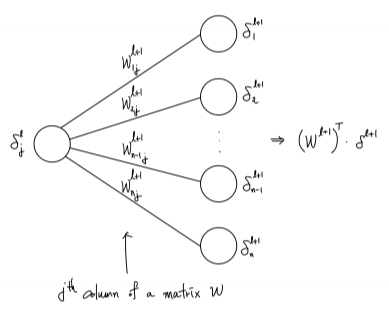

We can see the transpose of the weight vector gather the connection into one scalar.

Third, an equation for the rate of change of the loss with respect to any bias in the network:

$$(3)\quad\frac{\partial L_x}{\partial b_j^l}=\delta_j^l.$$

We will prove (3) in a component form. Then we have 

$$\frac{\partial L_x}{\partial b_j^l}=\sum_k\frac{\partial L_x}{\partial z_k^l}\frac{\partial z_k^l}{\partial b_j^l}=\frac{\partial L_x}{\partial z_j^l}\frac{\partial z_j^l}{\partial b_j^l}.$$

Note that $$\frac{\partial L_x}{\partial z_j^l}=\delta_j^l,\qquad\frac{\partial z_j^l}{\partial b_j^l}=\frac{\partial(\sum_kw_{jk}^{l}a_k^{l-1}+b_j^l)}{\partial b_j^l}=1.$$

Therefore, $$\frac{\partial L_x}{\partial b_j^l}=\frac{\partial L_x}{\partial z_j^l}\frac{\partial z_j^l}{\partial b_j^l}=\delta_j^l.$$

The equation can be generalized as

$$\frac{\partial L_x}{\partial b}=\delta.$$

Lastly, an equation for the rate of change of the loss with respect to any weight in the network:

$$(4)\quad\frac{\partial L_x}{\partial w_{jk}^l}=a_k^{l-1}\delta_j^l.$$

We wil prove (4) in a component form. Then we have

$$\frac{\partial L_x}{\partial w_{jk}^l}=\sum_s \frac{\partial L_x}{\partial z_{s}^l}\frac{\partial z_s^l}{\partial w_{jk}^l}=\frac{\partial L_x}{\partial z_{j}^l}\frac{\partial z_j^l}{\partial w_{jk}^l}.$$

Note that $$\frac{\partial L_x}{\partial z_j^l}=\delta_j^l,\qquad\frac{\partial z_j^l}{\partial w_{jk}^l}=\frac{\partial(\sum_sw_{js}^{l}a_s^{l-1}+b_j^l)}{\partial w_{jk}^l}=a_k^{l-1}.$$

Therefore, $$\frac{\partial L_x}{\partial w_{jk}^l}=\frac{\partial L_x}{\partial z_{j}^l}\frac{\partial z_j^l}{\partial w_{jk}^l}=a_k^{l-1}\delta_j^l.$$

The equation can be rewritten in a less index-heavy notation as

$$\frac{\partial L_x}{\partial w}=a_{in}\delta_{out},$$

where $a_{in}$ is the activation of the neuron input to the weight $w$, and $\delta_{out}$ is the error of the neuron output from the weight $w$.

### Interpretation

| The equations of backpropagation |
| :-: |
| $$\delta^L=\nabla_a L_x\odot\sigma'(z^L)$$ |
| $$\delta^l=((w^{l+1})^T\delta^{l+1})\odot\sigma'(z^l)$$ |
| $$\frac{\partial L_x}{\partial b_j^l}=\delta_j^l$$ |
| $$\frac{\partial L_x}{\partial w_{jk}^l}=a_k^{l-1}\delta_j^l$$ |

We will say a weight or bias "learns slowly" when it is not changing much during the gradient descent. Also, we will say the output neuron "has saturated" when the output neuron is either high- or low-activation, meaning that $a_j^l=\sigma(z_j^l)\approx0$ or $1$,therefore,$\sigma'(z_j^l)\approx0$.

A weight $w_{jk}^l$ will learn slowly or stop learning if either the input neuron is low-activation or if the output neuron has saturated. Similarly, a bias $b_j^l$  will learn slowly if the output neuron has saturated.

We can prevent the slow-down of learning that occur when sigmoid neurons saturated by choosing other activation function $\sigma$ where $\sigma'$ is always positive and never gets close to zero.

The goal of the backpropagation algorithm is to find the gradient vector for the loss function and it is composed by the partial derivatives of the loss function with respect to every weights and biases. Since the loss function is a function of the outputs in the final layer, we apply the chain rule to compute the effect of earlier weights and biases in the network.

Another approach to compute the partial derivatives of the weights and biases is as follow:

$$\frac{\partial L_x}{\partial w_j}\approx\frac{L_x(w+\epsilon e_j)-L_x(w)}{\epsilon}$$

where $e_j$ is the unit vector in the $j^{th}$ direction.

Suppose we have a million of weights in the network. To compute the gradient vector for the loss function using the above formula, we need to compute $L_x(w+\epsilon e_j)$, requiring a million forward passes through the network. We need to compute the $L_x(w)$ as well, so that's a total of a million and one forward passes through the network. In contrast, backpropagation enables us to compute all the partial derivatives simultaneously using just one forward pass through the network, followed by one backward pass through the network.